In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import numpy as np
from time import time
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img



In [3]:
Indian = '/content/gdrive/MyDrive/Indian'

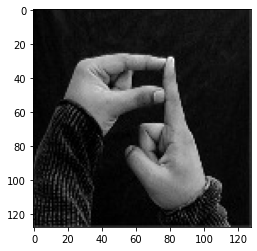

In [4]:
img = cv2.imread('/content/gdrive/MyDrive/Indian/P/0.jpg',0)
plt.imshow(img,cmap="gray")

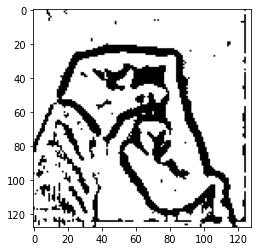

In [5]:
#Gaussian-Blur
def edge_detection(image):
  Picking_Img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
  minValue = 70
  blur = cv2.GaussianBlur(image,(5,5),2)
  th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
  ret, edge = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  return edge
img = cv2.imread('/content/gdrive/MyDrive/Indian/P/0.jpg')
img = edge_detection(img)
img = cv2.resize(img, (128, 128))
plt.imshow(img,cmap="gray")

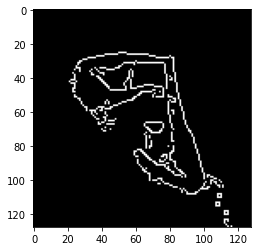

In [6]:
#Canny-Edge-Detection
def canny(image):
  Picking_Img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
  def threshold_vision(img_path):
    _,threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    return threshold_Img
  Threshold_Img = threshold_vision(image)
  canny_img = cv2.Canny(Threshold_Img,10,100)
  return(canny_img)
img = cv2.imread('/content/gdrive/MyDrive/Indian/P/0.jpg') 
img = canny(img)
img = cv2.resize(img, (128, 128))
plt.imshow(img,cmap="gray")

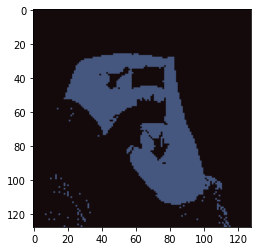

In [7]:
#k-means
def kmeans(image):
  pixel_vals = image.reshape((-1,3))
  pixel_vals = np.float32(pixel_vals)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
  k = 2
  retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]
  segmented_image = segmented_data.reshape((image.shape))
  return(segmented_image)
img = cv2.imread('/content/gdrive/MyDrive/Indian/P/0.jpg') 
img = kmeans(img) 
img = cv2.resize(img, (128, 128))
plt.imshow(img,cmap="gray")


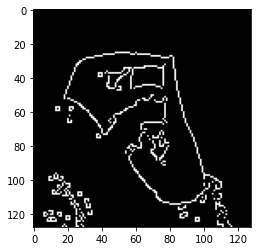

In [8]:
img = cv2.imread('/content/gdrive/MyDrive/Indian/P/0.jpg') 
img = kmeans(img)
img = canny(img)
img = cv2.resize(img, (128,128))
plt.imshow(img,cmap="gray")

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(Indian))
    for folder in folders:
        index += 1
        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(Indian + '/' + folder):
            img = cv2.imread(Indian + '/' + folder + '/' + image)
            img = kmeans(img)
            img = canny(img)
            img = cv2.resize(img, (64, 64)) 
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size=0.1)

    return x_train, x_test, y_train, y_test


In [11]:
start = time()
x_train, x_test, y_train, y_test = load_images()

Loading images from folder  1  has started.
Loading images from folder  2  has started.
Loading images from folder  3  has started.
Loading images from folder  4  has started.
Loading images from folder  5  has started.
Loading images from folder  6  has started.
Loading images from folder  7  has started.
Loading images from folder  8  has started.
Loading images from folder  9  has started.
Loading images from folder  A  has started.
Loading images from folder  B  has started.
Loading images from folder  C  has started.
Loading images from folder  D  has started.
Loading images from folder  E  has started.
Loading images from folder  F  has started.
Loading images from folder  G  has started.
Loading images from folder  H  has started.
Loading images from folder  I  has started.
Loading images from folder  J  has started.
Loading images from folder  K  has started.
Loading images from folder  L  has started.
Loading images from folder  M  has started.
Loading images from folder  N  h

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf

In [13]:
base_model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64,1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(35, activation='softmax')
])
base_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [14]:

epochs = 10
learning_rate = 0.0001
adam = Adam(lr=learning_rate)
base_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = base_model.fit(
                    x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test), shuffle=True)
bptime=time()-start




/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1205/1205 [==============================] - 15s 6ms/step - loss: 0.3408 - accuracy: 0.9305 - val_loss: 0.0303 - val_accuracy: 0.9907
Epoch 2/10
1205/1205 [==============================] - 7s 6ms/step - loss: 0.0206 - accuracy: 0.9940 - val_loss: 0.0253 - val_accuracy: 0.9930
Epoch 3/10
1205/1205 [==============================] - 7s 6ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.0185 - val_accuracy: 0.9944
Epoch 4/10
1205/1205 [==============================] - 7s 6ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.0137 - val_accuracy: 0.9953
Epoch 5/10
1205/1205 [==============================] - 7s 6ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0121 - val_accuracy: 0.9958
Epoch 6/10
1205/1205 [==============================] - 7s 6ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0225 - val_accuracy: 0.9921
Epoch 7/10
1205/1205 [==============================] - 7s 6ms/step - loss: 0.0091 - accuracy: 0.9968 - val_loss: 0.0118 - val_accuracy

In [15]:
base_model.save('/content/gdrive/MyDrive/models/basepapermodel.h5')

In [16]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

In [17]:
map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
                  13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                  25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}

In [18]:
class_labels = list(map_characters.values())

In [19]:
score = base_model.evaluate(x_test,y_test, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')

y_pred = base_model.predict(x_test, verbose = 1)
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
report = metrics.classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)



Keras CNN - accuracy: 0.9955659508705139 

134/134 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00       126
           3       1.00      1.00      1.00       115
           4       1.00      1.00      1.00       122
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00       107
           7       1.00      1.00      1.00       117
           8       1.00      1.00      1.00       125
           9       1.00      1.00      1.00       115
           A       1.00      1.00      1.00       105
           B       1.00      1.00      1.00       116
           C       0.98      1.00      0.99       130
           D       1.00      1.00      1.00       114
           E       1.00      1.00      1.00       128
           F       1.00      1.00      1.00       132
           G       1.00      1.00   

In [20]:
input=[]
check = cv2.imread('/content/gdrive/MyDrive/Indian/1/0.jpg')
check = kmeans(check)
check = canny(check)

check = cv2.resize(check, (64, 64))

input.append(check)
input = np.array(input)
input = input.astype('float32')/255.0


In [21]:
base_model.predict(input)


1/1 [==============================] - 0s 74ms/step


array([[9.9999940e-01, 6.2683296e-07, 3.8519117e-18, 1.4809760e-19,
        1.4472979e-20, 5.5525147e-17, 3.6083576e-14, 3.9514579e-21,
        7.2214297e-17, 3.2397497e-27, 1.1130584e-24, 1.1694759e-13,
        6.0777171e-16, 3.3762065e-18, 3.4106807e-17, 2.7097609e-14,
        2.5084548e-20, 5.4540344e-18, 5.1141516e-21, 7.1822396e-21,
        1.5037362e-11, 1.6944318e-14, 1.1434135e-21, 5.6526837e-13,
        1.1411386e-14, 7.8341080e-21, 4.2683487e-18, 2.2564714e-11,
        2.9188266e-15, 3.3877642e-19, 8.4590802e-14, 3.3982651e-17,
        1.0464159e-16, 5.2872508e-14, 1.2440826e-15]], dtype=float32)

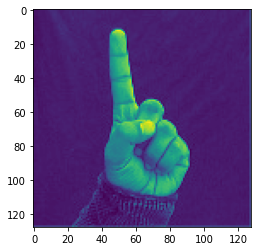

In [22]:
image1=cv2.imread('/content/gdrive/MyDrive/Indian/1/0.jpg',0)
plt.imshow(image1)

In [23]:
input=[]
check = cv2.imread('/content/gdrive/MyDrive/Indian/P/0.jpg')
check = kmeans(check)
check = canny(check)
check = cv2.resize(check, (64, 64))

input.append(check)
input = np.array(input)
input = input.astype('float32')/255.0
base_model.predict(input)


1/1 [==============================] - 0s 18ms/step


array([[1.3790223e-19, 2.6024756e-22, 2.3206976e-18, 2.9113511e-18,
        4.1038248e-21, 4.1182432e-18, 8.0437654e-20, 3.5852448e-19,
        4.6552537e-26, 1.2596939e-16, 1.4205465e-19, 2.1091097e-14,
        5.4377271e-19, 8.2630753e-16, 5.0980398e-16, 3.7981751e-18,
        8.4855372e-22, 1.8780812e-12, 8.2019000e-16, 1.0030102e-23,
        6.1960374e-11, 4.6867997e-23, 6.1480340e-21, 7.5579984e-14,
        1.0000000e+00, 1.5764505e-18, 2.8161615e-13, 3.3373804e-20,
        3.5451034e-16, 2.0630039e-11, 1.8789505e-17, 6.5177902e-21,
        1.9276662e-17, 2.8577471e-15, 6.5003562e-22]], dtype=float32)

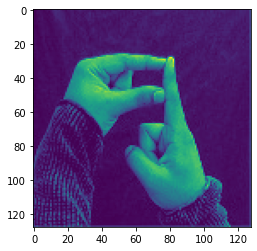

In [24]:
image1=cv2.imread('/content/gdrive/MyDrive/Indian/P/0.jpg',0)
plt.imshow(image1)

####Training Different Architectures


In [25]:
train_folder = '/content/gdrive/MyDrive/Indian'
all_data = []
for folder in os.listdir(train_folder):
    
    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    #print(onlyfiles)
    all_data += onlyfiles
data_df = pd.DataFrame(all_data)
data_df

,label,path
0,1,/content/gdrive/MyDrive/Indian/1/1133.jpg
1,1,/content/gdrive/MyDrive/Indian/1/117.jpg
2,1,/content/gdrive/MyDrive/Indian/1/118.jpg
3,1,/content/gdrive/MyDrive/Indian/1/1183.jpg
4,1,/content/gdrive/MyDrive/Indian/1/1175.jpg
...,...,...
42840,5,/content/gdrive/MyDrive/Indian/5/317.jpg
42841,5,/content/gdrive/MyDrive/Indian/5/1099.jpg
42842,5,/content/gdrive/MyDrive/Indian/5/308.jpg
42843,5,/content/gdrive/MyDrive/Indian/5/175.jpg


In [26]:
x_train,x_holdout = train_test_split(data_df, test_size= 0.10, random_state=42,stratify=data_df[['label']])
x_train,x_test = train_test_split(x_train, test_size= 0.20, random_state=42,stratify=x_train[['label']])

In [27]:
img_width, img_height = 75, 75
batch_size = 128
y_col = 'label'
x_col = 'path'
no_of_classes = len(data_df[y_col].unique())


train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=x_train,x_col=x_col, y_col=y_col,color_mode="rgb",
    target_size=(img_width, img_height),class_mode='categorical', batch_size=batch_size,
    shuffle=False,
)

validation_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=x_test, x_col=x_col, y_col=y_col,color_mode="rgb",
    target_size=(img_width, img_height), class_mode='categorical', batch_size=batch_size,
    shuffle=False
)

holdout_datagen = ImageDataGenerator(rescale = 1/255.0)
holdout_generator = holdout_datagen.flow_from_dataframe(
    dataframe=x_holdout, x_col=x_col, y_col=y_col,color_mode="rgb",
    target_size=(img_width, img_height), class_mode='categorical', batch_size=batch_size,
    shuffle=False
)

Found 30848 validated image filenames belonging to 35 classes.
Found 7712 validated image filenames belonging to 35 classes.
Found 4285 validated image filenames belonging to 35 classes.


In [28]:
from tensorflow.keras.applications import ResNet50V2


In [29]:
resnet50v2arch= ResNet50V2(input_shape=(75, 75, 3), include_top=False, weights="imagenet")
resnet50v2arch.trainable = False 

94668760/94668760 [==============================] - 7s 0us/step


In [30]:
resnet50v2arch.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 81, 81, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 38, 38, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 40, 40, 64)   0           ['conv1_conv[0][0]']             
                                                                                         

In [31]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dropout_layer_1 = layers.Dropout(0.5)
prediction_layer = layers.Dense(35, activation='softmax')


res_model = models.Sequential([
    resnet50v2arch,
    flatten_layer,
    dense_layer_1,
    dropout_layer_1,
    prediction_layer
])


In [23]:
res_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 3, 3, 2048)        23564800  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               9437696   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 35)                17955     
                                                                 
Total params: 33,020,451
Trainable params: 9,455,651
Non-trainable params: 23,564,800
_________________________________________________________________


In [32]:
start = time()
classes = 35
epochs = 10
learning_rate = 0.0001
adam = Adam(lr=learning_rate)
res_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = res_model.fit(train_generator,
                    epochs=epochs,
                    verbose=1,
                    validation_data=validation_generator, shuffle=True)
restime=time()-start

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
241/241 [==============================] - 80s 310ms/step - loss: 0.1368 - accuracy: 0.9770 - val_loss: 7.0641e-05 - val_accuracy: 1.0000
Epoch 2/10
241/241 [==============================] - 73s 301ms/step - loss: 9.6324e-04 - accuracy: 0.9998 - val_loss: 2.4528e-05 - val_accuracy: 1.0000
Epoch 3/10
241/241 [==============================] - 75s 312ms/step - loss: 5.0032e-04 - accuracy: 0.9999 - val_loss: 1.1854e-05 - val_accuracy: 1.0000
Epoch 4/10
241/241 [==============================] - 72s 300ms/step - loss: 9.6427e-04 - accuracy: 0.9998 - val_loss: 5.8817e-06 - val_accuracy: 1.0000
Epoch 5/10
241/241 [==============================] - 72s 299ms/step - loss: 4.7577e-04 - accuracy: 0.9998 - val_loss: 3.2234e-06 - val_accuracy: 1.0000
Epoch 6/10
241/241 [==============================] - 72s 299ms/step - loss: 2.8358e-04 - accuracy: 0.9999 - val_loss: 2.5266e-06 - val_accuracy: 1.0000
Epoch 7/10
241/241 [==============================] - 73s 301ms/step - loss: 4.7111e-0

In [33]:
res_model.save('/content/gdrive/MyDrive/models/resnet50v2model.h5')

In [34]:
from keras.applications.vgg16 import VGG16


In [35]:
VGG16arch = VGG16(weights = "imagenet", include_top = False, input_shape = (75, 75, 3))
VGG16arch.trainable = False 

58889256/58889256 [==============================] - 5s 0us/step


In [36]:
VGG16arch.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0     

In [37]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dropout_layer_1 = layers.Dropout(0.5)
#dense_layer_2 = layers.Dense(512, activation='relu')
#dropout_layer_2 = layers.Dropout(0.5)
prediction_layer = layers.Dense(35, activation='softmax')


vgg16_model = models.Sequential([
    VGG16arch,
    flatten_layer,
    dense_layer_1,
    dropout_layer_1,
    #dense_layer_2,
    #dropout_layer_2,
    prediction_layer
])
vgg16_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 35)                17955     
                                                                 
Total params: 15,781,731
Trainable params: 1,067,043
Non-trainable params: 14,714,688
_________________________________________________________________


In [38]:
start = time()
classes = 35
epochs = 10
learning_rate = 0.0001

adam = Adam(lr=learning_rate)
vgg16_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = vgg16_model.fit(train_generator,
                    epochs=epochs,
                    verbose=1,
                    validation_data=validation_generator, shuffle=True)
vgg_time=time()-start

Epoch 1/10
241/241 [==============================] - 76s 306ms/step - loss: 1.1665 - accuracy: 0.8242 - val_loss: 0.1175 - val_accuracy: 0.9996
Epoch 2/10
241/241 [==============================] - 72s 297ms/step - loss: 0.0974 - accuracy: 0.9984 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 3/10
241/241 [==============================] - 73s 303ms/step - loss: 0.0345 - accuracy: 0.9997 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 4/10
241/241 [==============================] - 72s 298ms/step - loss: 0.0181 - accuracy: 0.9998 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 5/10
241/241 [==============================] - 71s 295ms/step - loss: 0.0112 - accuracy: 0.9999 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 6/10
241/241 [==============================] - 72s 297ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 7/10
241/241 [==============================] - 71s 295ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0015 - val_ac

In [39]:
vgg16_model.save('/content/gdrive/MyDrive/models/vgg16model.h5')

In [40]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [41]:
inceptionv3arch = InceptionV3(input_shape=(75,75,3), weights='imagenet', include_top=False)
inceptionv3arch.trainable = False

87910968/87910968 [==============================] - 7s 0us/step


In [42]:
inceptionv3arch.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 37, 37, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[

In [43]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dropout_layer_1 = layers.Dropout(0.5)
#dense_layer_2 = layers.Dense(512, activation='relu')
#dropout_layer_2 = layers.Dropout(0.5)
prediction_layer = layers.Dense(35, activation='softmax')


incept_model = models.Sequential([
    inceptionv3arch,
    flatten_layer,
    dense_layer_1,
    dropout_layer_1,
    #dense_layer_2,
    #dropout_layer_2,
    prediction_layer
])
incept_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 35)                17955     
                                                                 
Total params: 22,869,827
Trainable params: 1,067,043
Non-trainable params: 21,802,784
_________________________________________________________________


In [44]:
start = time()
classes = 35
epochs = 10
learning_rate = 0.0001

adam = Adam(lr=learning_rate)
incept_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = incept_model.fit(train_generator,
                    epochs=epochs,
                    verbose=1,
                    validation_data=validation_generator, 
                    shuffle=True)
incept_time=time()-start

Epoch 1/10
241/241 [==============================] - 78s 302ms/step - loss: 0.6348 - accuracy: 0.8645 - val_loss: 0.0250 - val_accuracy: 0.9988
Epoch 2/10
241/241 [==============================] - 72s 300ms/step - loss: 0.0378 - accuracy: 0.9964 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 3/10
241/241 [==============================] - 70s 290ms/step - loss: 0.0158 - accuracy: 0.9989 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 4/10
241/241 [==============================] - 71s 294ms/step - loss: 0.0088 - accuracy: 0.9994 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/10
241/241 [==============================] - 70s 291ms/step - loss: 0.0058 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/10
241/241 [==============================] - 70s 293ms/step - loss: 0.0041 - accuracy: 0.9998 - val_loss: 9.0545e-04 - val_accuracy: 1.0000
Epoch 7/10
241/241 [==============================] - 72s 298ms/step - loss: 0.0030 - accuracy: 0.9998 - val_loss: 6.7202e-04 

In [45]:
incept_model.save('/content/gdrive/MyDrive/models/inceptmodel.h5')

In [52]:
print("Time Taken to Train CNN model : " , bptime)
print("Time Taken to Train CNN model with ResNet50v2 Architecture : " , restime)
print("Time Taken to Train CNN model with VGG16 Architecture : " , vgg_time)
print("Time Taken to Train CNN model with ResNet50v2 Architecture : " , incept_time)

Time Taken to Train CNN model :  2303.0565841197968
Time Taken to Train CNN model with ResNet50v2 Architecture :  750.0463175773621
Time Taken to Train CNN model with VGG16 Architecture :  721.7155723571777
Time Taken to Train CNN model with ResNet50v2 Architecture :  724.9020564556122


In [46]:
from tensorflow.keras.models import load_model

In [55]:
inc=load_model('/content/gdrive/MyDrive/models/inceptmodel.h5')


In [67]:
incpredictions = inc.predict(holdout_generator, verbose=1)
incpredicted_classes = np.argmax(incpredictions, axis=-1)
incpredictions = np.argmax(incpredictions, axis=-1)

inctrue_classes = holdout_generator.classes
incclass_labels = list(holdout_generator.class_indices.keys())  
report = metrics.classification_report(inctrue_classes, incpredicted_classes, target_names=class_labels)
print(report)

34/34 [==============================] - 9s 253ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       121
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       120
           6       1.00      1.00      1.00       120
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00       120
           9       1.00      1.00      1.00       120
           A       1.00      1.00      1.00       120
           B       1.00      1.00      1.00       120
           C       1.00      1.00      1.00       145
           D       1.00      1.00      1.00       120
           E       1.00      1.00      1.00       120
           F       1.00      1.00      1.00       120
           G       1.00      1.00      1.00       120
           H       1.00   

In [57]:
incconfusion = metrics.confusion_matrix(inctrue_classes, incpredicted_classes)
print('Confusion Matrix\n')
print(incconfusion)

Confusion Matrix

[[121   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 120]]


In [65]:
res=load_model('/content/gdrive/MyDrive/models/resnet50v2model.h5')
respredictions = res.predict(holdout_generator, verbose=1)
respredicted_classes = np.argmax(respredictions, axis=-1)
respredictions = np.argmax(respredictions, axis=-1) #multiple categories

restrue_classes = holdout_generator.classes
resclass_labels = list(holdout_generator.class_indices.keys())  
report = metrics.classification_report(restrue_classes, respredicted_classes, target_names=class_labels)
print(report)

34/34 [==============================] - 9s 244ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       121
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       120
           6       1.00      1.00      1.00       120
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00       120
           9       1.00      1.00      1.00       120
           A       1.00      1.00      1.00       120
           B       1.00      1.00      1.00       120
           C       1.00      1.00      1.00       145
           D       1.00      1.00      1.00       120
           E       1.00      1.00      1.00       120
           F       1.00      1.00      1.00       120
           G       1.00      1.00      1.00       120
           H       1.00   

In [66]:
resconfusion = metrics.confusion_matrix(restrue_classes, respredicted_classes)
print('Confusion Matrix\n')
print(resconfusion)

Confusion Matrix

[[121   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 120]]


In [60]:
vgg=load_model('/content/gdrive/MyDrive/models/vgg16model.h5')

In [63]:
vgg=load_model('/content/gdrive/MyDrive/models/resnet50v2model.h5')
vgpredictions = vgg.predict(holdout_generator, verbose=1)
vgpredicted_classes = np.argmax(vgpredictions, axis=-1)
vgpredictions = np.argmax(vgpredictions, axis=-1) #multiple categories

vgtrue_classes = holdout_generator.classes
vgclass_labels = list(holdout_generator.class_indices.keys())  
report = metrics.classification_report(vgtrue_classes, vgpredicted_classes, target_names=class_labels)
print(report)

34/34 [==============================] - 9s 241ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       121
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       120
           6       1.00      1.00      1.00       120
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00       120
           9       1.00      1.00      1.00       120
           A       1.00      1.00      1.00       120
           B       1.00      1.00      1.00       120
           C       1.00      1.00      1.00       145
           D       1.00      1.00      1.00       120
           E       1.00      1.00      1.00       120
           F       1.00      1.00      1.00       120
           G       1.00      1.00      1.00       120
           H       1.00   

In [64]:
vgconfusion = metrics.confusion_matrix(vgtrue_classes, vgpredicted_classes)
print('Confusion Matrix\n')
print(vgconfusion)

Confusion Matrix

[[121   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 120]]


In [155]:
bp=load_model('/content/gdrive/MyDrive/models/basepapermodel.h5')

In [156]:
map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
                  13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                  25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}
def incdemonstrate(path): 
  img=image.load_img(path,target_size=(75,75))
  x=image.img_to_array(img)
  x=np.array([x])
  x=x/255
  b=np.argmax(inc.predict(x))
  final=map_characters.get(b)
  return final
def resdemonstrate(path): 
  img=image.load_img(path,target_size=(75,75))
  x=image.img_to_array(img)
  x=np.array([x])
  x=x/255
  b=np.argmax(res.predict(x))
  final=map_characters.get(b)
  return final
def vggdemonstrate(path): 
  img=image.load_img(path,target_size=(75,75))
  x=image.img_to_array(img)
  x=np.array([x])
  x=x/255
  b=np.argmax(vgg.predict(x))
  final=map_characters.get(b)
  return final
def bpdemonstrate(path):
  input=[]
  check = cv2.imread(path)
  check = kmeans(check)
  check = canny(check)
  check = cv2.resize(check, (64, 64))
  input.append(check)
  input = np.array(input)
  input = input.astype('float32')/255.0
  b=np.argmax(bp.predict(input))
  final=map_characters.get(b)
  return final

In [164]:
print(incdemonstrate('/content/gdrive/MyDrive/Indian/1/0.jpg'))
print(resdemonstrate('/content/gdrive/MyDrive/Indian/D/1002.jpg'))
print(vggdemonstrate('/content/gdrive/MyDrive/Indian/4/166.jpg'))
print(bpdemonstrate('/content/gdrive/MyDrive/Indian/6/1004.jpg'))

1/1 [==============================] - 0s 41ms/step
1
1/1 [==============================] - 0s 31ms/step
D
1/1 [==============================] - 0s 32ms/step
4
1/1 [==============================] - 0s 24ms/step
6
